Demonstrate the following edge detection methods and interpret the results<br>

i. First Order Derivative Methods.<br>
ii. Second Order Derivative Methods.<br>
iii. Optimum Edge Detection Method.<br>


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Image not found. Please check the path and try again.")

In [6]:
# First Order Derivative - Sobel Operator
def sobel_edge_detection(img):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    rows, cols = img.shape
    edge_x = np.zeros((rows, cols))
    edge_y = np.zeros((rows, cols))
    
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            gx = np.sum(sobel_x * img[i-1:i+2, j-1:j+2])
            gy = np.sum(sobel_y * img[i-1:i+2, j-1:j+2])
            edge_x[i, j] = gx
            edge_y[i, j] = gy
    
    sobel_magnitude = np.sqrt(edge_x**2 + edge_y**2)
    sobel_magnitude = np.uint8(sobel_magnitude / np.max(sobel_magnitude) * 255)
    return sobel_magnitude

<b>First Order Derivative Method (Sobel Operator)</b><br>
Detects edges by emphasizing horizontal and vertical gradients in the image. The result highlights significant edges, with noise or minor gradients less visible. The Sobel Operator detects edges by calculating the gradient magnitude of image intensity.<br>

Steps:<br>
1. Define Sobel Kernels: Sobel operator uses two kernels to approximate gradients along the x and y directions.<br>
Sobel X kernel: Detects vertical edges.<br>
Sobel Y kernel: Detects horizontal edges.<br>

2. Apply Convolution with Sobel Kernels: For each pixel, compute gradients (Gx and Gy) by applying the Sobel kernels. This involves multiplying the pixel's neighbors by the kernel values and summing them.<br>

3. Compute Gradient Magnitude: Combine the horizontal and vertical gradients to get the overall edge magnitude:<br>
Edge Magnitude = sqrt(Gx^2 + Gy^2)<br>
  
4. Normalize the Result: Convert the edge magnitude values to an 8-bit scale (0-255) for visualization.

In [7]:
# Second Order Derivative - Laplacian Operator
def laplacian_edge_detection(img):
    laplacian_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    rows, cols = img.shape
    laplacian_edge = np.zeros((rows, cols))
    
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            laplacian_edge[i, j] = np.sum(laplacian_kernel * img[i-1:i+2, j-1:j+2])
    
    laplacian_edge = np.uint8(np.abs(laplacian_edge) / np.max(np.abs(laplacian_edge)) * 255)
    return laplacian_edge

<b>Second Order Derivative Method (Laplacian Operator)</b><br>
nhances edges by highlighting regions where intensity changes rapidly. It is sensitive to noise, so minor variations can also appear as edges. The Laplacian operator enhances edges by emphasizing areas where intensity changes sharply in all directions. It’s a second derivative method, sensitive to noise, making it better suited for high-contrast edges.<br>

Steps:<br>
1. Define Laplacian Kernel: The Laplacian kernel we use here focuses on the center pixel and its immediate neighbors, capturing intensity variations in all directions.<br>

2. Apply Convolution with the Laplacian Kernel: For each pixel, apply the Laplacian kernel to compute the second derivative. This process captures regions with rapid intensity changes.<br>

3. Take the Absolute Value and Normalize: Convert negative values to positive, normalizing the results to fit within an 8-bit scale (0-255).<>

In [8]:
# Optimum Edge Detection - Canny Edge Detector
def canny_edge_detection(img, low_threshold=50, high_threshold=150):
    # Step 1: Gaussian Blur
    gaussian_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
    blurred_img = cv2.filter2D(img, -1, gaussian_kernel)
    
    # Step 2: First Order Derivative - Sobel for gradient
    edge_magnitude = sobel_edge_detection(blurred_img)
    
    # Step 3: Thresholding
    edges = np.zeros(edge_magnitude.shape)
    strong_edges = (edge_magnitude > high_threshold)
    weak_edges = ((edge_magnitude >= low_threshold) & (edge_magnitude <= high_threshold))
    
    edges[strong_edges] = 255
    edges[weak_edges] = 75  # Assign weak edges for tracking

    return np.uint8(edges)

<b>Optimum Edge Detection Method (Canny Edge Detector)</b><br>
ombines Gaussian blurring with edge tracking by hysteresis, resulting in cleaner edges. This technique is robust against noise and can handle low-contrast edges better. The Canny edge detector is an advanced method designed to detect edges robustly by reducing noise and tracking only significant edges. It’s known as an “optimum” edge detector for its ability to maintain detail while reducing noise.<br>

Steps:<br>
1. Gaussian Blurring: Begin by applying a Gaussian filter to smooth the image, reducing noise and preventing small variations from affecting edge detection.<br>

2. Gradient Calculation (Using Sobel): Apply the Sobel operator to calculate gradients, getting the magnitude of intensity changes across the image.<br>

3. Non-Maximum Suppression: Thin out edges by suppressing pixels that are not local maxima, which preserves only the most significant edge pixels.<br>

4. Thresholding with Hysteresis: Set two threshold values:<br>
High Threshold for strong edges.<br>
Low Threshold for weak edges that are part of a stronger edge. Only strong edges and weak edges connected to strong edges are kept, ensuring continuity.

In [9]:
# Perform edge detection
sobel_edges = sobel_edge_detection(image)
laplacian_edges = laplacian_edge_detection(image)
canny_edges = canny_edge_detection(image)

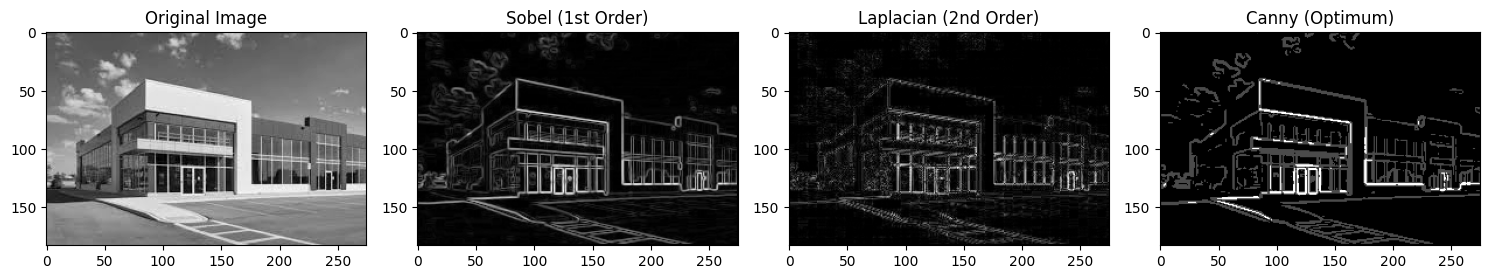

In [11]:
# Plotting the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 4, 2), plt.imshow(sobel_edges, cmap='gray'), plt.title('Sobel (1st Order)')
plt.subplot(1, 4, 3), plt.imshow(laplacian_edges, cmap='gray'), plt.title('Laplacian (2nd Order)')
plt.subplot(1, 4, 4), plt.imshow(canny_edges, cmap='gray'), plt.title('Canny (Optimum)')
plt.tight_layout()
plt.show()


<b>INTERPRETATION</b><br>
Sobel (First Order): Effective for detecting directionally distinct edges with minimal noise handling.<br>
Laplacian (Second Order): Captures abrupt intensity transitions but can be sensitive to noise.<br>
Canny (Optimum): A robust solution for edge detection, balancing detail preservation and noise reduction.<br>
<br>
Each method has advantages depending on the application requirements, such as sensitivity to noise, level of edge detail, and directional detection.